In [1]:
import os
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Параметри ---
test_dir = '/Users/davemag9/Desktop/Diploma/food20dataset/test_set'
img_size = (224, 224)
batch_size = 32

# --- Завантаження моделі ---
model = load_model('./model_en22.h5')

# --- Побудова DataFrame з шляхами до зображень і мітками ---
categories = sorted(os.listdir(test_dir))
categories = [category for category in categories if category != '.DS_Store']

dfs = []
max_images_per_category = 600

for category in categories:
    category_path = os.path.join(test_dir, category)
    image_data = []
    count = 0
    for image_name in os.listdir(category_path):
        if count >= max_images_per_category:
            break
        image_path = os.path.join(category_path, image_name)
        if os.path.isfile(image_path):  # Перевірка на файл
            image_data.append({'image_path': image_path, 'label': category})
            count += 1
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

test_df = pd.concat(dfs, ignore_index=True)

# --- Генератор тестових зображень ---
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_images = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    seed=42,
    class_mode='categorical'
)

# --- Оцінювання моделі ---
loss, acc = model.evaluate(test_images)
print(f'Test loss: {loss:.4f}, Test accuracy: {acc:.4f}')


Found 930 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.0122 - loss: 3.8257
Test loss: 3.8936, Test accuracy: 0.0323


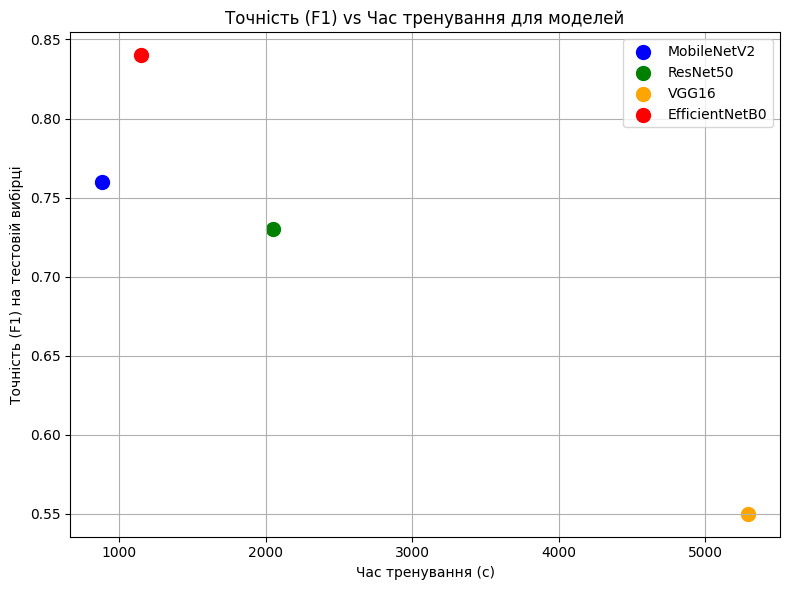

In [1]:
import matplotlib.pyplot as plt

# Дані
models = ['MobileNetV2', 'ResNet50', 'VGG16', 'EfficientNetB0']
training_times = [884, 2047, 5290, 1150]  # по осі X
f1_scores = [0.76, 0.73, 0.55, 0.84]     # по осі Y
colors = ['blue', 'green', 'orange', 'red']

# Побудова графіку
plt.figure(figsize=(8, 6))
for model, x, y, color in zip(models, training_times, f1_scores, colors):
    plt.scatter(x, y, color=color, label=model, s=100)

plt.title('Точність (F1) vs Час тренування для моделей')
plt.xlabel('Час тренування (с)')
plt.ylabel('Точність (F1) на тестовій вибірці')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


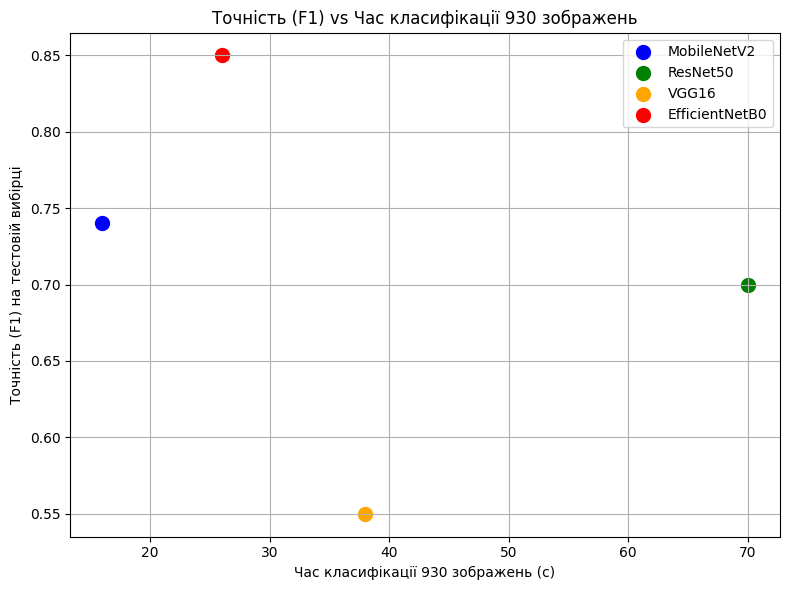

In [4]:
import matplotlib.pyplot as plt

# Дані
models = ['MobileNetV2', 'ResNet50', 'VGG16', 'EfficientNetB0']
training_times = [16, 70, 38, 26]  # по осі X
f1_scores = [0.74, 0.70, 0.55, 0.85]     # по осі Y
colors = ['blue', 'green', 'orange', 'red']

# Побудова графіку
plt.figure(figsize=(8, 6))
for model, x, y, color in zip(models, training_times, f1_scores, colors):
    plt.scatter(x, y, color=color, label=model, s=100)

plt.title('Точність (F1) vs Час класифікації 930 зображень')
plt.xlabel('Час класифікації 930 зображень (с)')
plt.ylabel('Точність (F1) на тестовій вибірці')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
